In [1]:
import pandas as pd
from insight_utils import print_prediction, line_plot_column, bar_groups_chart, box_plot, grouped_box_plot

#### Data

In [2]:
initial_path = "results/gpt-3.5-turbo-16k/initial/"
modifiers_path = "results/gpt-3.5-turbo-16k/with modifiers/"

########## INITIAL ##########
base_prompt_df = pd.read_csv(initial_path + "base_prompt.csv")
description_df = pd.read_csv(initial_path + "description.csv")
follow_up_df = pd.read_csv(initial_path + "follow_up.csv")
headings_first_df = pd.read_csv(initial_path + "headings_first.csv")
important_parts_df = pd.read_csv(initial_path + "important_parts.csv")
improve_df = pd.read_csv(initial_path + "improve.csv")
persona_df = pd.read_csv(initial_path + "persona.csv")
repeat_df = pd.read_csv(initial_path + "repeat.csv")
step_by_step_df = pd.read_csv(initial_path + "step_by_step.csv")
template_df = pd.read_csv(initial_path + "template.csv")
topic_df = pd.read_csv(initial_path + "topic.csv")
analyze_main_themes_df = pd.read_csv(initial_path + "analyze_main_themes.csv")
main_points_df = pd.read_csv(initial_path + "main_points.csv")
in_context_df = pd.read_csv(initial_path + "in_context.csv")

########## MODIFIERS ##########
mod_base_prompt_df = pd.read_csv(modifiers_path + "base_prompt.csv")
mod_description_df = pd.read_csv(modifiers_path + "description.csv")
mod_follow_up_df = pd.read_csv(modifiers_path + "follow_up.csv")
mod_headings_first_df = pd.read_csv(modifiers_path + "headings_first.csv")
mod_important_parts_df = pd.read_csv(modifiers_path + "important_parts.csv")
mod_improve_df = pd.read_csv(modifiers_path + "improve.csv")
mod_persona_df = pd.read_csv(modifiers_path + "persona.csv")
mod_repeat_df = pd.read_csv(modifiers_path + "repeat.csv")
mod_step_by_step_df = pd.read_csv(modifiers_path + "step_by_step.csv")
mod_template_df = pd.read_csv(modifiers_path + "template.csv")
mod_topic_df = pd.read_csv(modifiers_path + "topic.csv")
mod_analyze_main_themes_df = pd.read_csv(modifiers_path + "analyze_main_themes.csv")
mod_main_points_df = pd.read_csv(modifiers_path + "main_points.csv")
mod_in_context_df = pd.read_csv(modifiers_path + "in_context.csv")

dataframes = [base_prompt_df, mod_base_prompt_df, description_df, mod_description_df,
              follow_up_df, mod_follow_up_df, headings_first_df, mod_headings_first_df, 
              important_parts_df, mod_important_parts_df, improve_df, mod_improve_df, 
              persona_df, mod_persona_df, repeat_df, mod_repeat_df, 
              step_by_step_df, mod_step_by_step_df, template_df, mod_template_df, 
              topic_df, mod_topic_df, analyze_main_themes_df, mod_analyze_main_themes_df,
              main_points_df, mod_main_points_df, in_context_df, mod_in_context_df]
patterns = ["base_prompt", "description", "follow_up", "headings_first", "important_parts",
            "improve", "persona", "repeat", "step_by_step", "template", "topic", "analyze_main_themes",
            "main_points", "in_context"]

metrics = [
        "rouge_1",
        "rouge_2",
        "rouge_L",
        "bert_score",
        "long_bullets",
        "long_subheadings",
        "contradiction_ratio",
        "errors",
        "three_by_three",
        "geval_fluency",
        "geval_relevance",
        "geval_coherence",
        "geval_consistency",
    ]
    
titles = ["How AI could empower any business", "Pussy Riot's powerful message to Vladimir Putin", "What's next in 3D printing"]




d:\Program Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


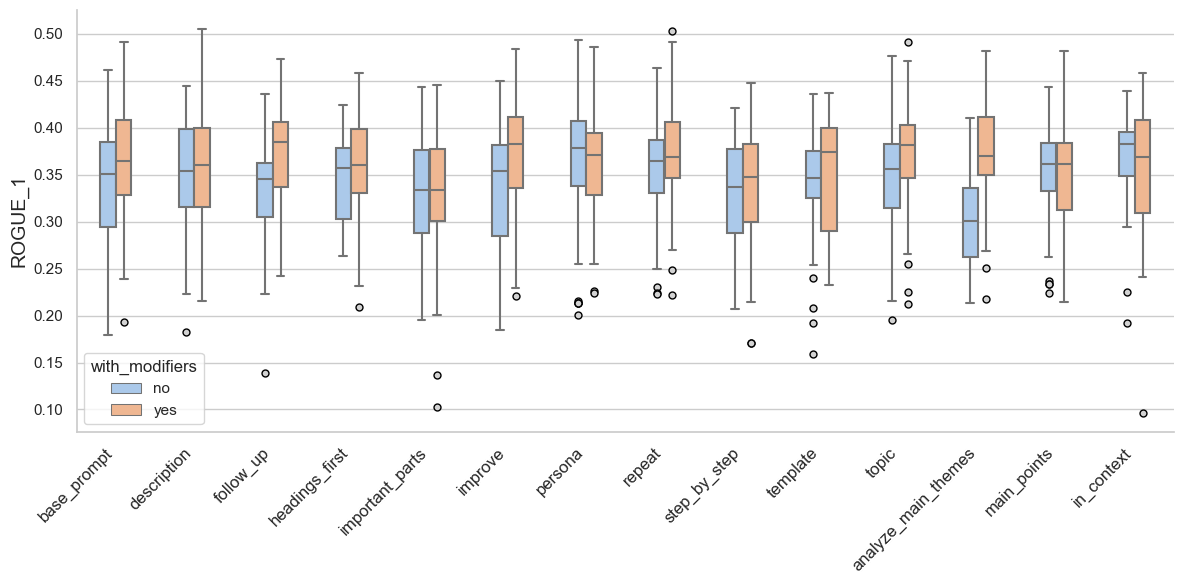

d:\Program Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


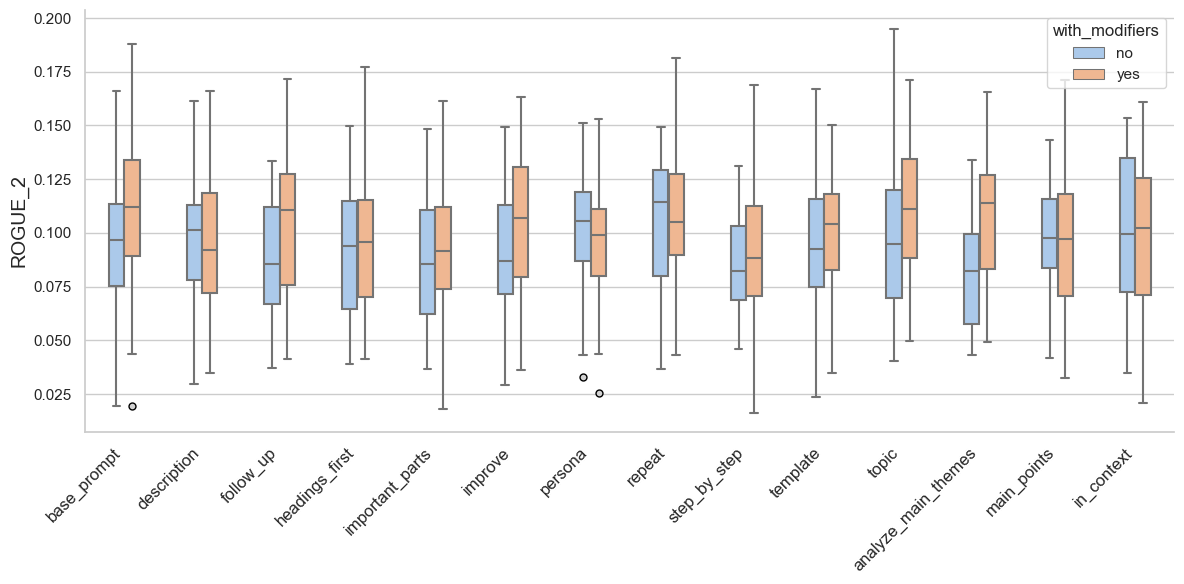

d:\Program Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


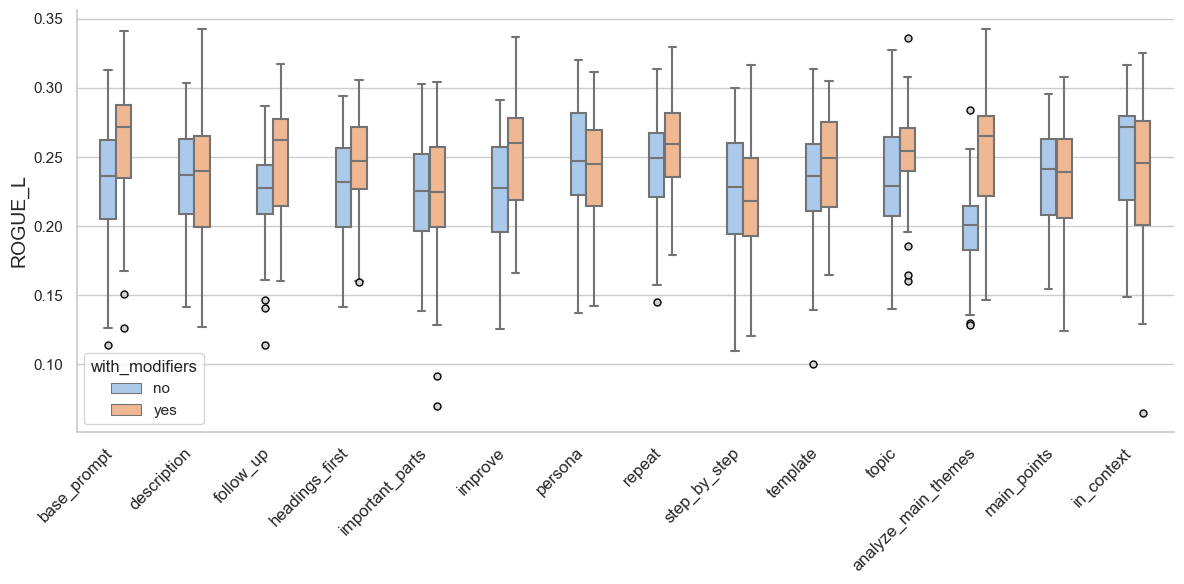

d:\Program Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


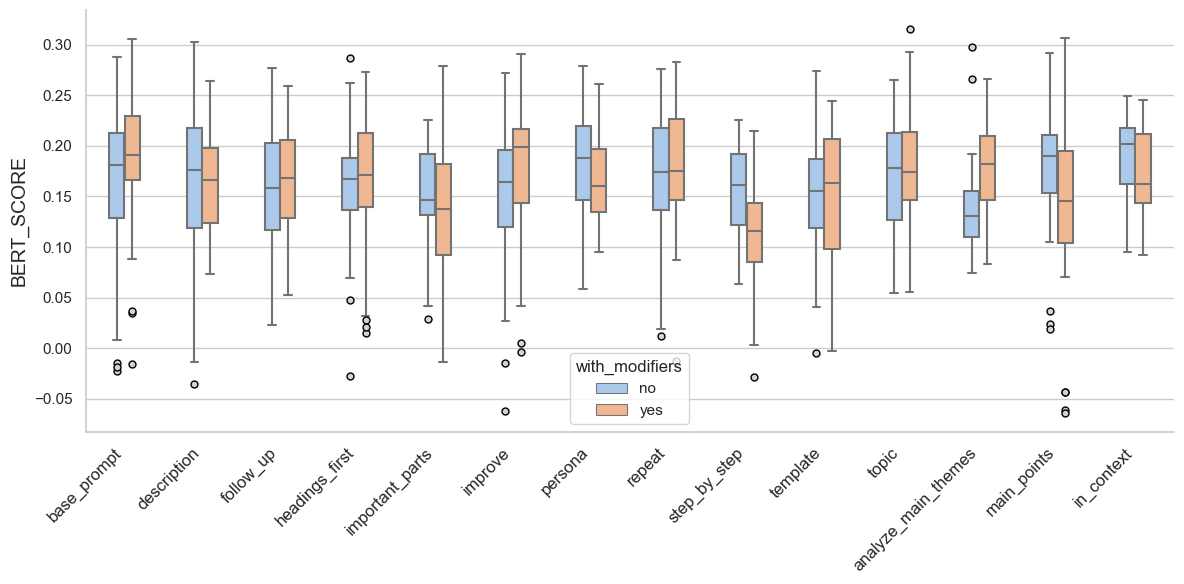

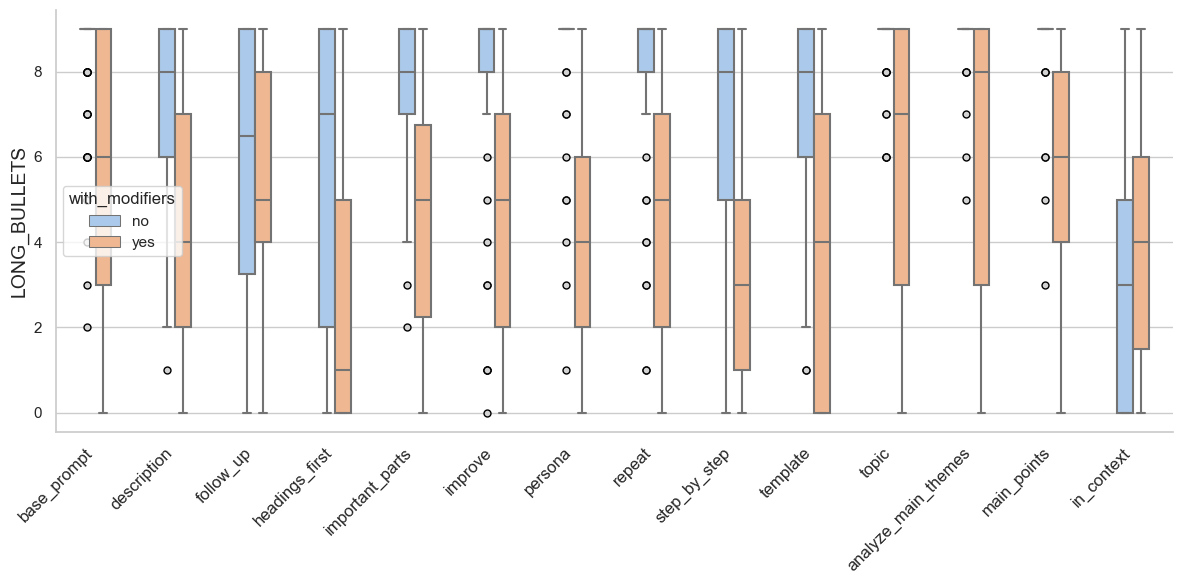

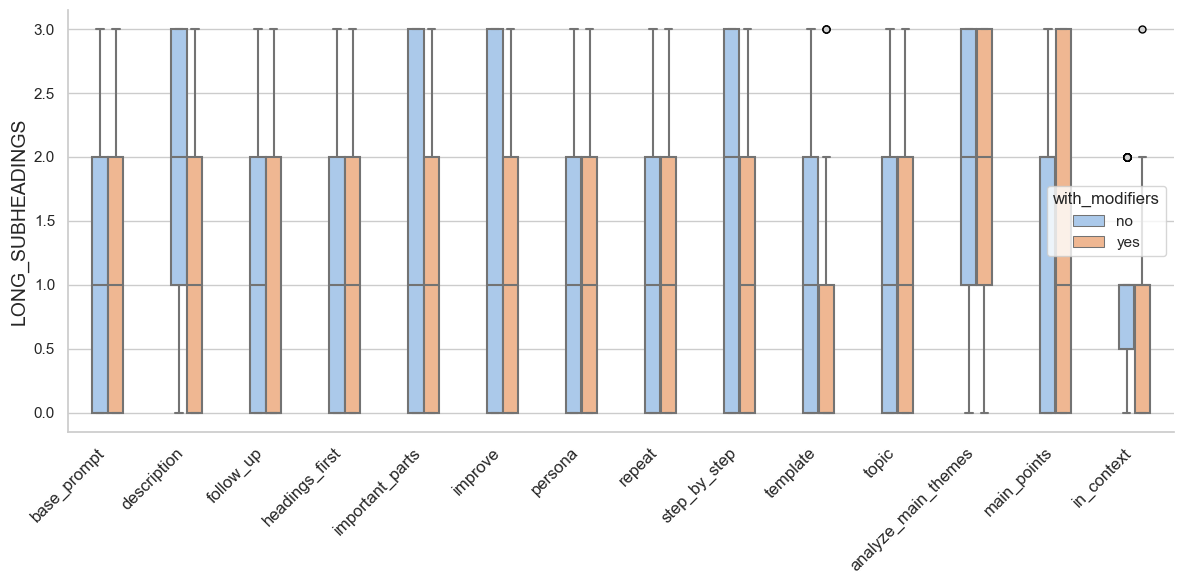

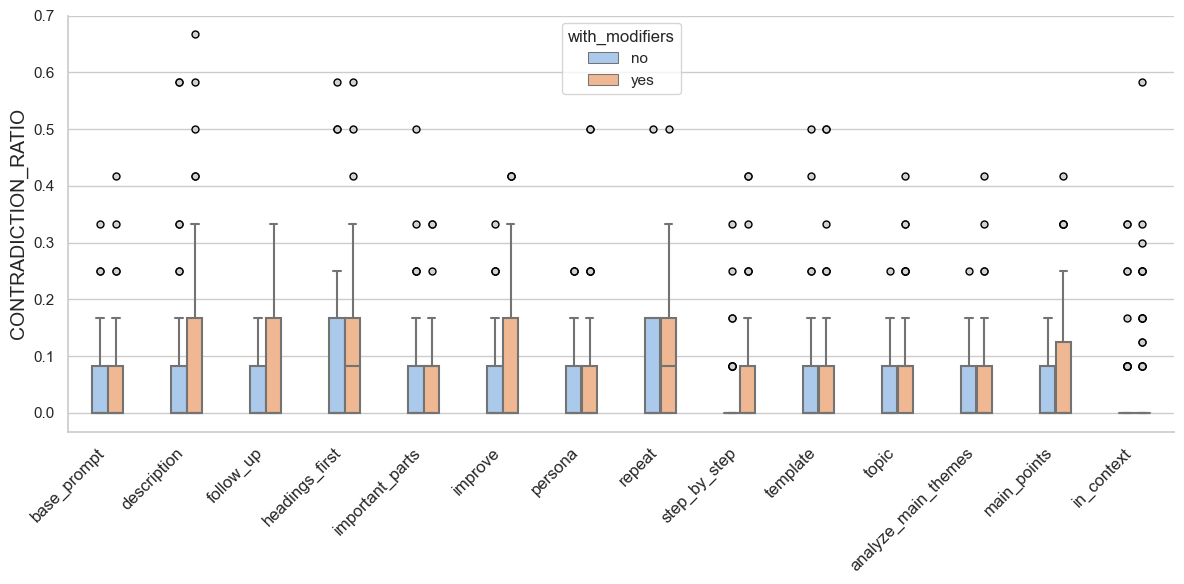

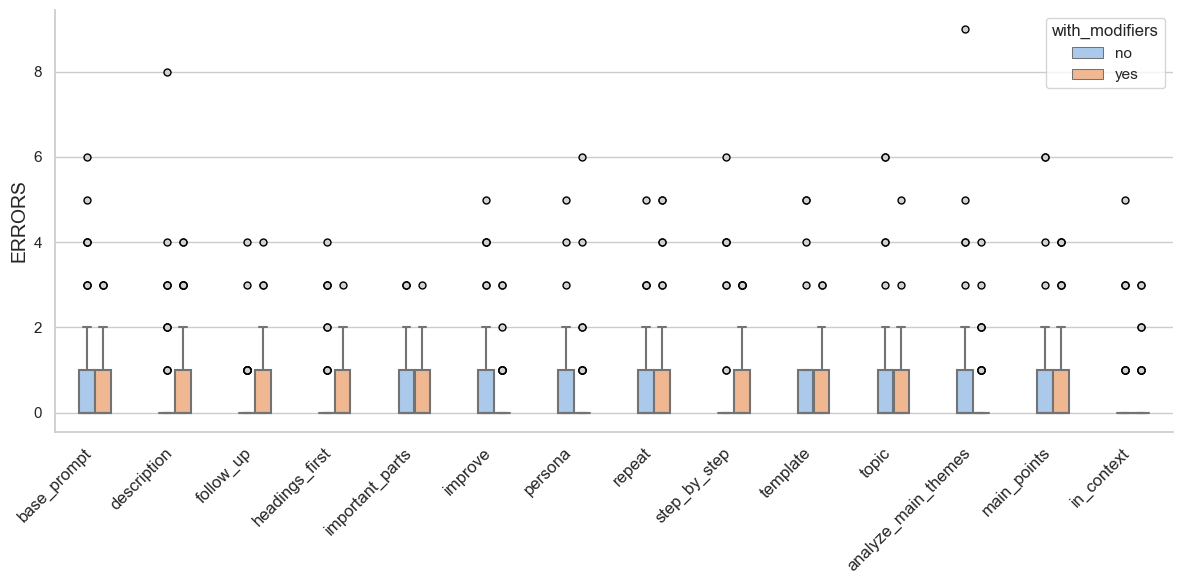

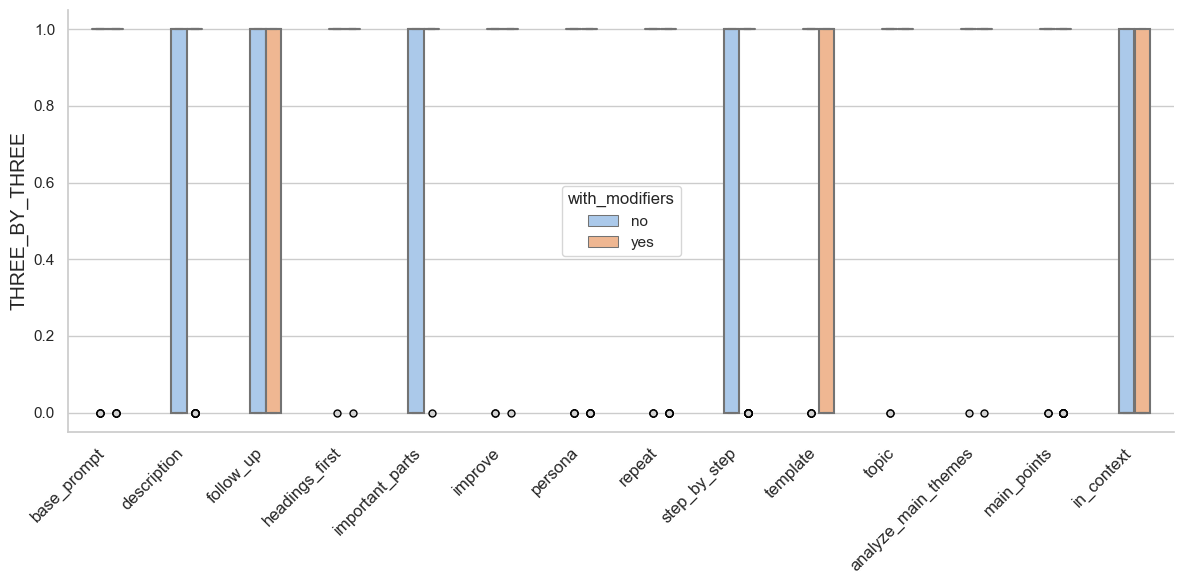

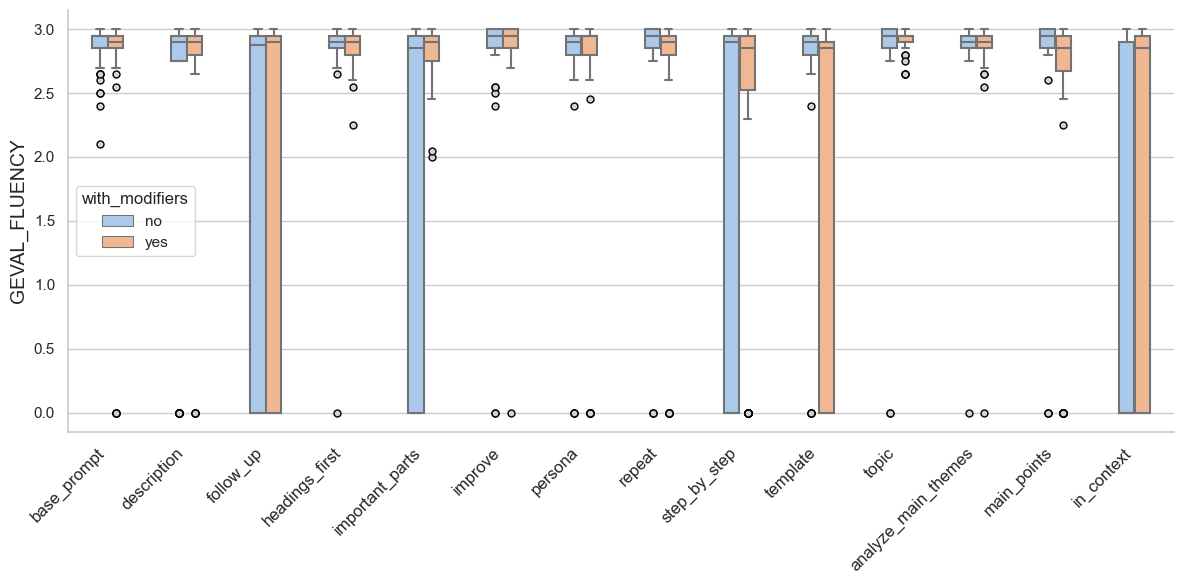

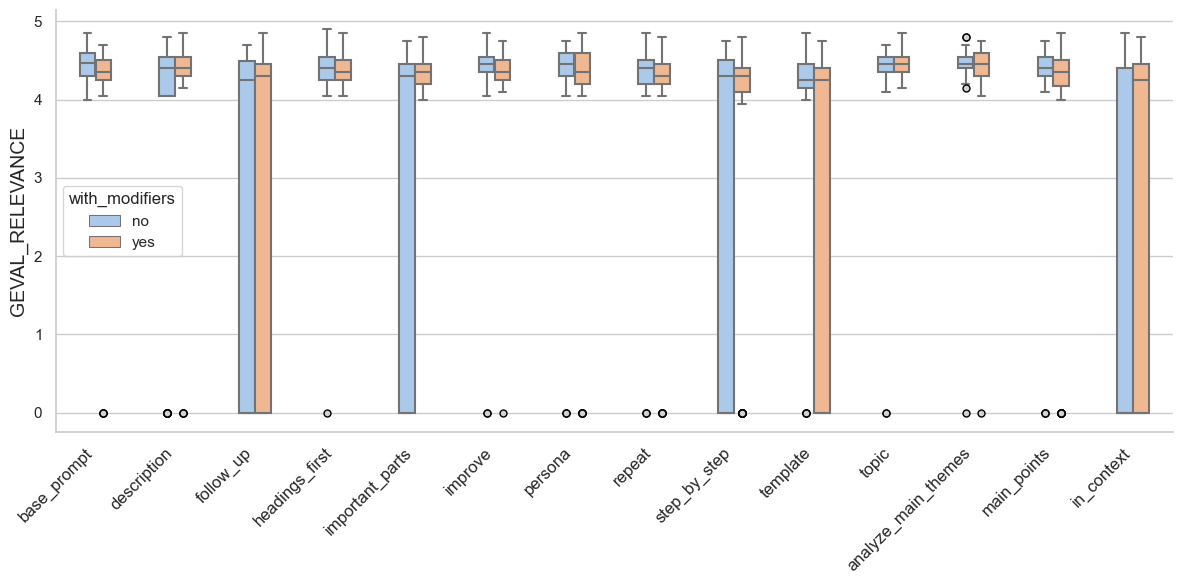

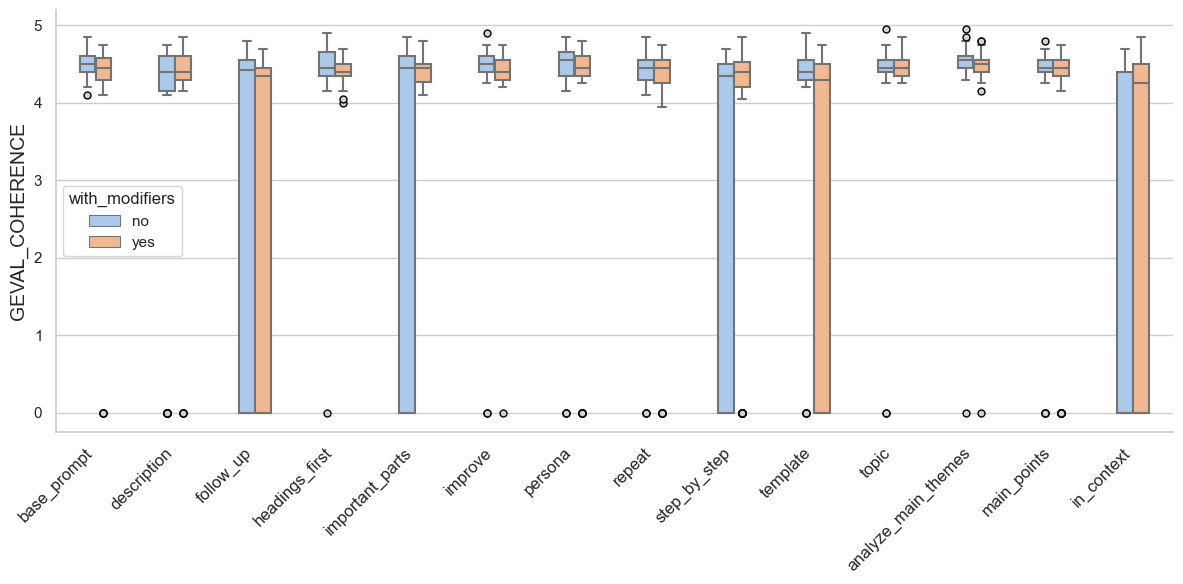

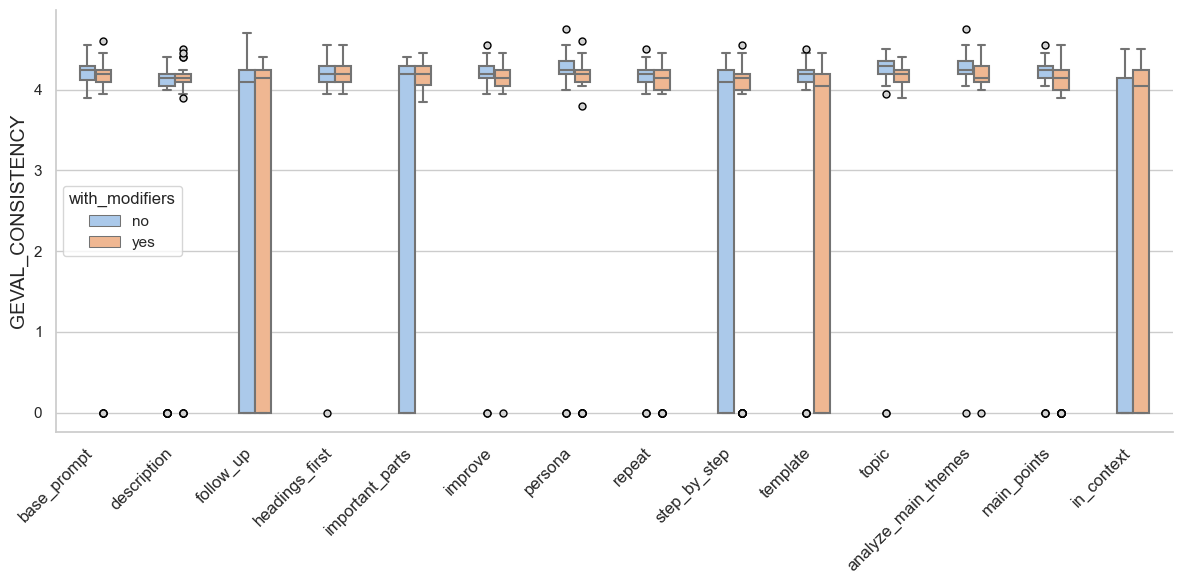

In [3]:
for metric in metrics:
    grouped_box_plot(dataframes, patterns, metric, width=12)